<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230131.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [2]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta 

import os
import re

from functools import reduce
from collections import defaultdict
from scipy import stats

# Customer Analysis

In [3]:
os.listdir()

['.config',
 'test.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 '1_customers_dataset.csv',
 'groceries.csv',
 'scanner_data.csv',
 'online_retail.xlsx',
 'mock_sales_data.csv',
 'mall_customers.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'cookie_cats.csv',
 'bz_data_analyis.csv',
 'sales.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'app_wau.csv',
 'sales_data_with_stores.csv',
 'online_retail_II.xlsx',
 'match_result_test.csv',
 '1_order_payments_dataset.csv',
 '1_orders_dataset.csv',
 'ecommerce-data.csv',
 'sample-sales-data.csv',
 'lead_conversion.csv',
 'sales_vs_discount.csv',
 'ab_experiment.csv',
 'sample_data']

In [5]:
df = pd.read_csv('cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [6]:
cnt = pd.melt(df, id_vars = ['userid','version','sum_gamerounds'], var_name = 'retention', value_name = 'result')
cnt = cnt.groupby(['version','retention','result'])['userid'].count().reset_index().rename(columns = {'userid':'cnt'})
cnt = cnt[cnt['result'] == True]
cnt

,version,retention,result,cnt
1,gate_30,retention_1,True,20034
3,gate_30,retention_7,True,8502
5,gate_40,retention_1,True,20119
7,gate_40,retention_7,True,8279


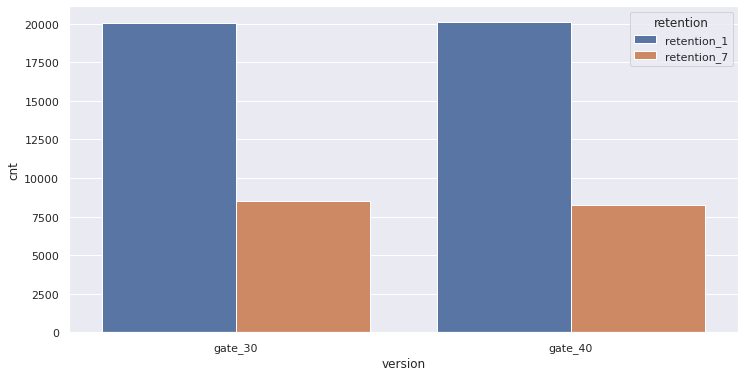

In [8]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.barplot(data = cnt, x = 'version', y = 'cnt', hue = 'retention')
plt.show()

In [10]:
stat, p = stats.chisquare(df['sum_gamerounds'])
print(str(stat) + '\n' + str(p))

66146621.50561835
0.0


In [15]:
df = df[df['sum_gamerounds'] <= 3000]

In [16]:
n = 1000
boots = pd.DataFrame(
    [df.sample(frac = .1, replace = True).groupby(['version'])['sum_gamerounds'].mean() for i in range(n)]
)
boots.head()

version,gate_30,gate_40
sum_gamerounds,52.198615,52.855602
sum_gamerounds,54.931485,53.300960
sum_gamerounds,49.912984,50.562961
sum_gamerounds,51.295174,49.337423
sum_gamerounds,48.685978,50.865808


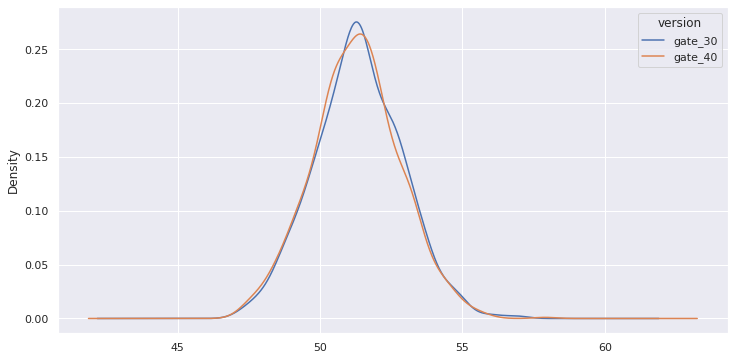

In [17]:
boots.plot.kde()

In [18]:
diff = boots['gate_30'] - boots['gate_40']
len(diff[diff>0])/n

0.504

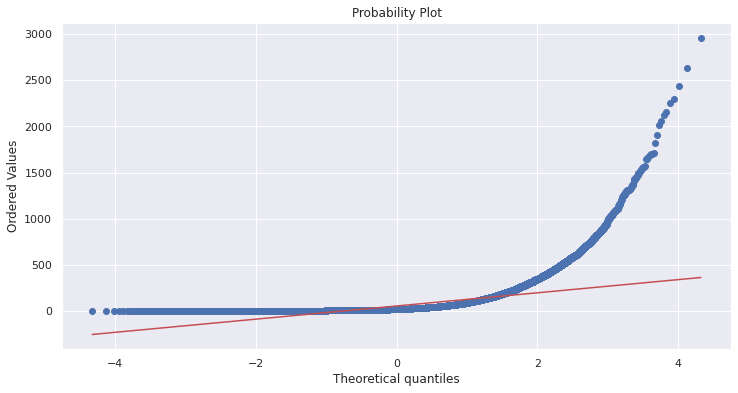

In [19]:
stats.probplot(df['sum_gamerounds'], dist = 'norm', plot = plt)
plt.show()

In [21]:
cl = np.quantile(diff, [0.25, 0.975])
cl

array([-1.29722399,  4.2300927 ])

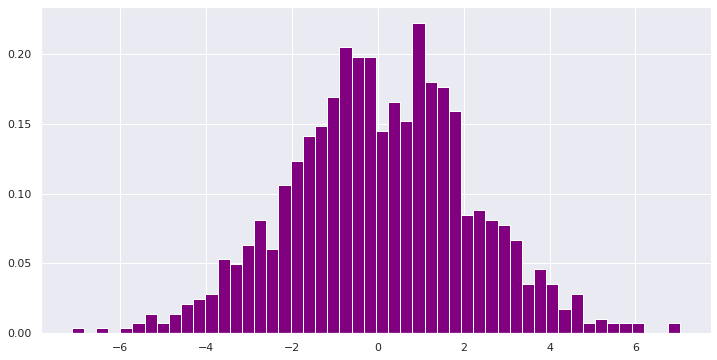

In [26]:
counts,bins,ignored = plt.hist(diff,50,density = True,color = 'purple')

In [28]:
print(counts)
print('='*20)
print(bins)
print('='*20)
print(ignored)

[0.00352757 0.         0.00352757 0.         0.00352757 0.00705513
 0.01411027 0.00705513 0.01411027 0.0211654  0.02469297 0.02822054
 0.05291351 0.04938594 0.06349621 0.08113405 0.05996864 0.10582702
 0.12346485 0.14110269 0.14815783 0.16932323 0.2045989  0.19754377
 0.19754377 0.14463026 0.16579566 0.15168539 0.22223674 0.17990593
 0.17637836 0.15874053 0.08466161 0.08818918 0.08113405 0.07760648
 0.06702378 0.03527567 0.04585837 0.03527567 0.01763784 0.02822054
 0.00705513 0.0105827  0.00705513 0.00705513 0.00705513 0.
 0.         0.00705513]
[-7.13023891 -6.84675742 -6.56327594 -6.27979446 -5.99631298 -5.71283149
 -5.42935001 -5.14586853 -4.86238705 -4.57890557 -4.29542408 -4.0119426
 -3.72846112 -3.44497964 -3.16149815 -2.87801667 -2.59453519 -2.31105371
 -2.02757222 -1.74409074 -1.46060926 -1.17712778 -0.8936463  -0.61016481
 -0.32668333 -0.04320185  0.24027963  0.52376112  0.8072426   1.09072408
  1.37420556  1.65768704  1.94116853  2.22465001  2.50813149  2.79161297
  3.0750944

In [30]:
sum_a = df[df['version'] == 'gate_30']['sum_gamerounds']
sum_b = df[df['version'] == 'gate_40']['sum_gamerounds']

In [34]:
stat, p = stats.mannwhitneyu(sum_a, sum_b)
print(str(stat) + '\n' + str(p))
# if p > 0.05 : Failed to reject H0 : no significant difference

1024285761.5
0.05089155279145376


* Parametric 모수 검정
  * normal(or close) distribution
  * t-test, ANOVA
* Non-Parametric 비모수 검정
  * continous data is not normally distirbuted
  * discrete data is tested
  * chi-squared : Large N, relationship between A & B
  * Fishers' exact Test : Small N, relationship between A & B
  * Mann-Whitney U-test : Small or Large N, Skewed sampling distribution, difference medians between A & B
  * H0 : P>0.5, There is no significant difference between A & B

# Iterators

In [35]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [36]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}